This notebook holds the results up until now for sims that have runtime of atleast 8 hours.

The followsing sims are included:

-3000 iter, correlation:

- 996938 low
- 1063535 variable
- 1063539 high

-3000 iter, pli+corr:

- 1067826 low
- 1067827 variable
- 1067828 high

-5650 iter, pli+corr
- 1146310 high

-8450 iter, pli+corr
- 1146308 high





In [1]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [3]:
JOB = ['996938', '1063535', '1063539',
       
       '1067826', '1067827', '1067828',
      
      '1146310','1146308']

Loading all the data we need for analysis

In [4]:
NTASKS =[120]
NUM_JOBS = len(JOB)
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 8


{'1063535': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-21/1063535/load_genvars_delays5.py',
 '1063539': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-21/1063539/load_genvars_delays6.py',
 '1067826': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-22/1067826/load_genvars_delays_pli_corr4.py',
 '1067827': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-22/1067827/load_genvars_delays_pli_corr5.py',
 '1067828': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-22/1067828/load_genvars_delays_pli_corr6.py',
 '1146308': '/scratch/l/lfefebvr/noorir/model/Output/2019-04-19/1146308/load_genvars_delays_pli_corr6.py',
 '1146310': '/scratch/l/lfefebvr/noorir/model/Output/2019-04-18/1146310/load_genvars_delays_pli_corr5.py',
 '996938': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-05/996938/load_genvars_delays1.py'}

In [5]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) in NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res_ = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res_)
    else:
        print("Error", job)
        break

0  Job: 996938, lowest MSE:  0.059114493492929174
1  Job: 1063535, lowest MSE:  0.004047887415854594
2  Job: 1063539, lowest MSE:  1.232595164407831e-32
3  Job: 1067826, lowest MSE:  0.050305432367109916
4  Job: 1067827, lowest MSE:  0.024850200161823106
5  Job: 1067828, lowest MSE:  0.036850978200368936
6  Job: 1146310, lowest MSE:  0.05652649799902148
7  Job: 1146308, lowest MSE:  0.05973591397884403


# Saving the result vectors for each run and calculating MSE for CV

In [6]:
all_mse = []
all_res_true = {} #dictionary of all the target arrays
import seaborn as sns

996938  true vs est: mse =  13.1248732737


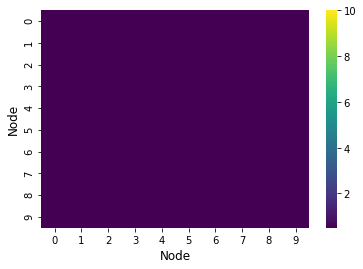

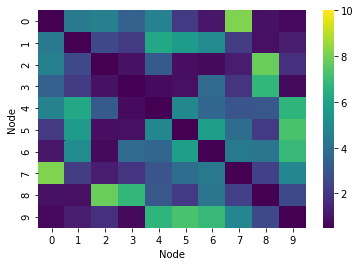

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


1063535  true vs est: mse =  13.8053373918


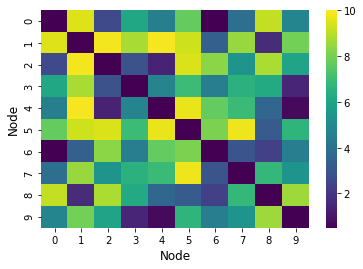

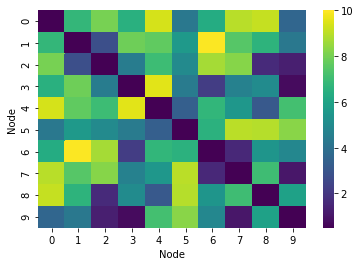

1063539  true vs est: mse =  13.8724006017


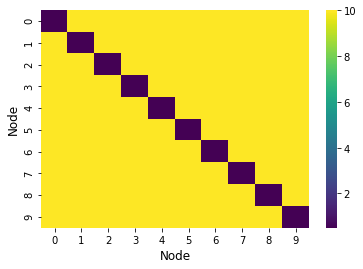

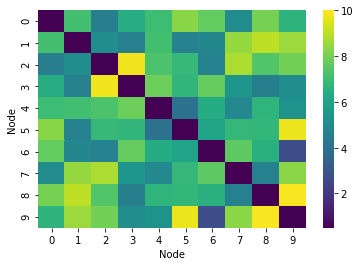

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1067826  true vs est: mse =  23.6563483341


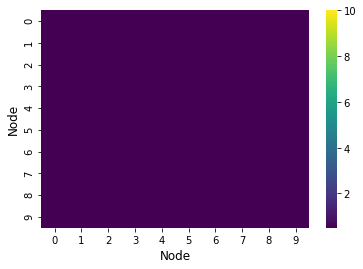

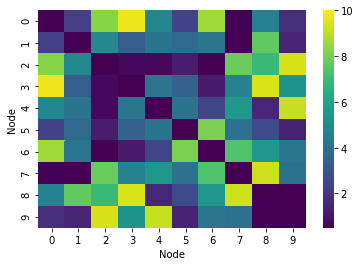

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1067827  true vs est: mse =  11.7068203802


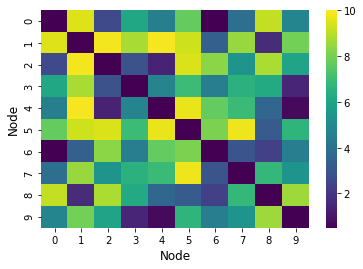

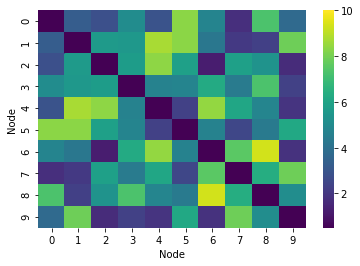

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1067828  true vs est: mse =  23.4537661942


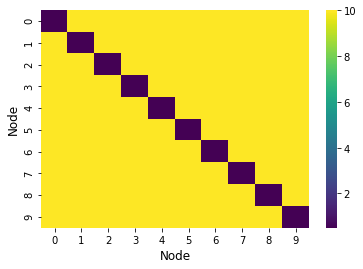

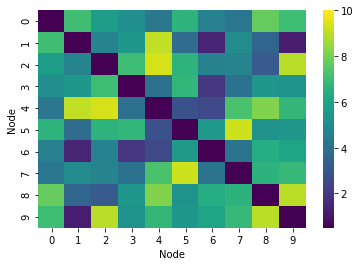

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1146310  true vs est: mse =  15.4385946003


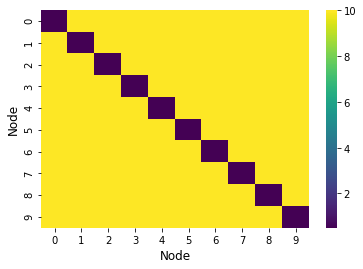

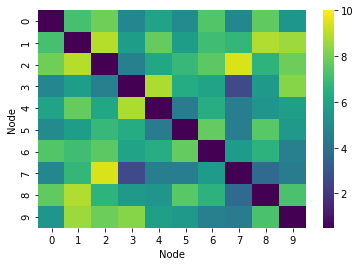

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1146308  true vs est: mse =  20.1399808609


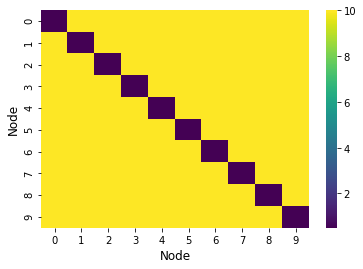

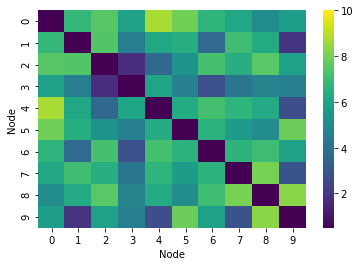

In [14]:
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    all_res_true[JOB[i]] = c_mat
    if i == 1:
        master_tract = tract_mat
    
# Calculate MSE between true and target for each
    thing = np.triu(np.reciprocal(all_res_true[JOB[i]], where = all_res_true[JOB[i]] >0),1).ravel()
    err = hf.mse(thing[thing != 0]/1000,all_res[JOB[i]]/1000)
    all_mse.append(err)
    print(JOB[i], " true vs est: mse = ", err)
    #if you want to white-out the diagonals:
    #sns.heatmap(hf.p2matrix(thing[thing != 0],10)/1000, mask = hf.p2matrix(thing[thing != 0],10)/1000 ==0, 
    #            vmax = 10, vmin = 0.5, cmap = "viridis")
    sns.heatmap(hf.p2matrix(thing[thing != 0],10)/1000, vmax = 10, vmin = 0.5, cmap = "viridis")
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.show()
    sns.heatmap(hf.p2matrix(all_res[JOB[i]],10)/1000, vmax = 10, vmin = 0.5, cmap = "viridis")
    plt.xlabel("Node")
    plt.ylabel("Node")
    #plt.savefig(JOB[i]+"est_cv.png", facecolor = "None")
    plt.show()

Plot of TARGET time series

996938


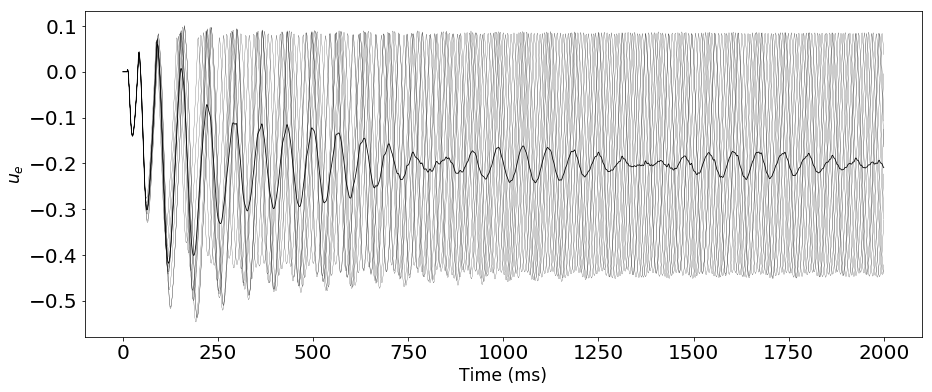

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


1063535


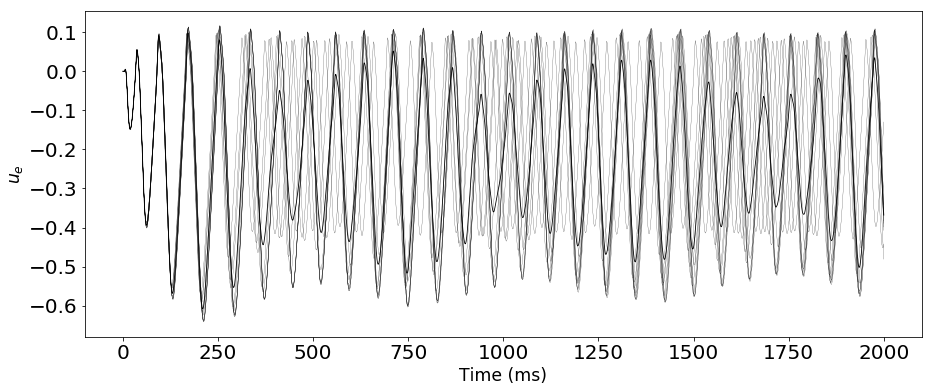

1063539


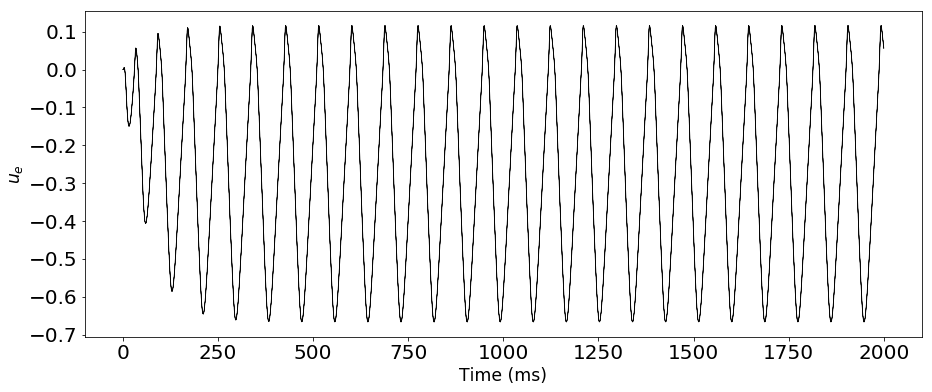

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1067826


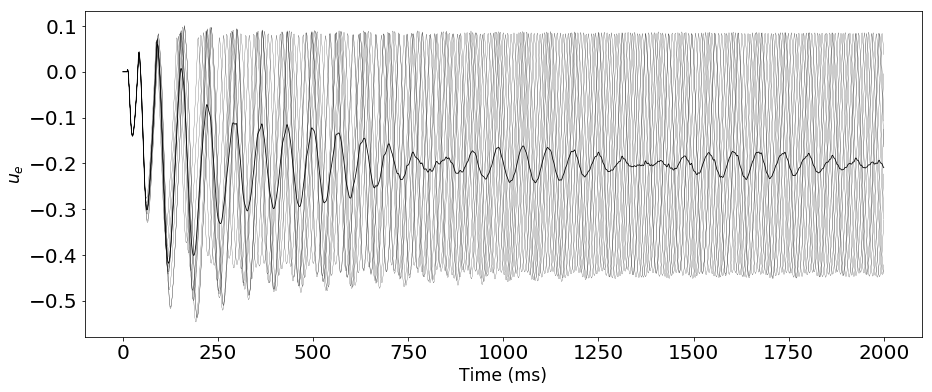

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1067827


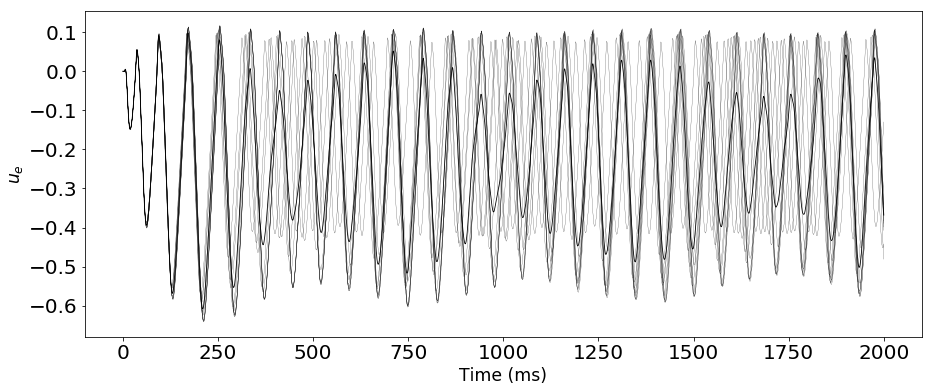

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1067828


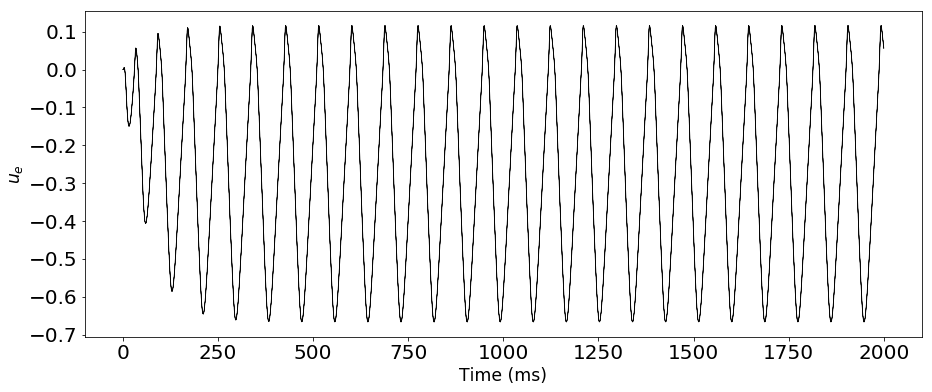

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1146310


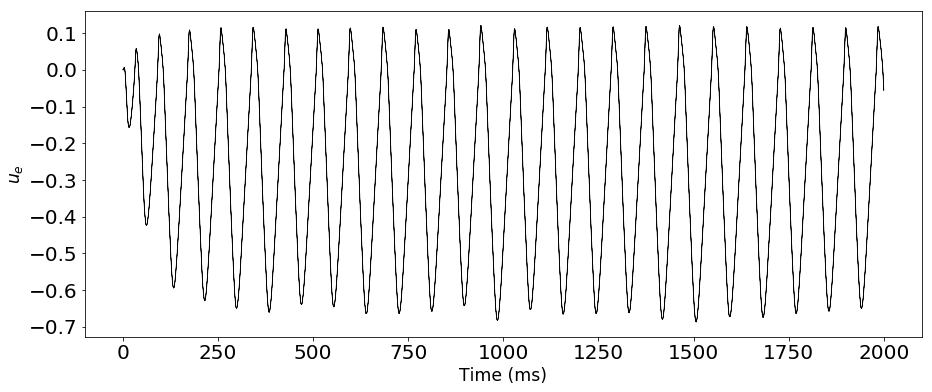

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1146308


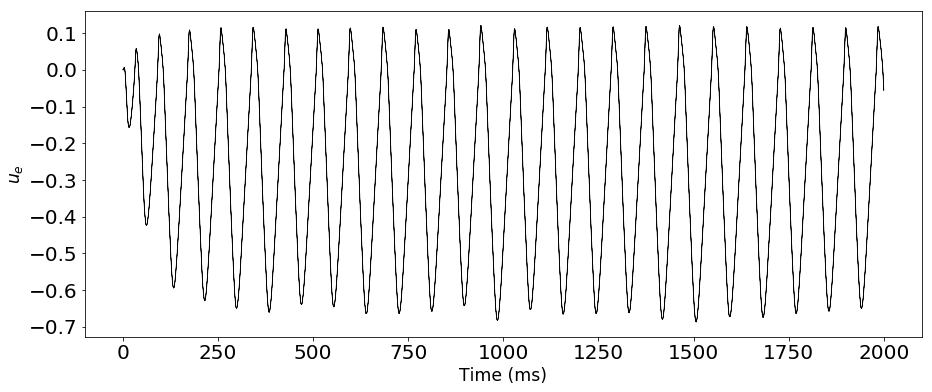

In [10]:
import matplotlib.pyplot as plt
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read())
    print(JOB[i])
    
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()


# STARTING ANALYSIS

Plotting all histograms of all the conduction vel estimates

996938 cv estimate distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


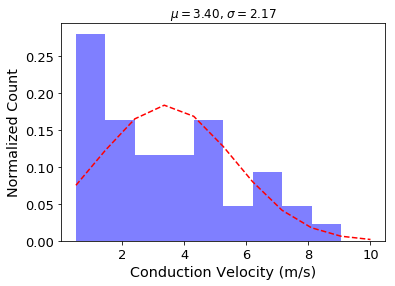

996938 signal delay estimate distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


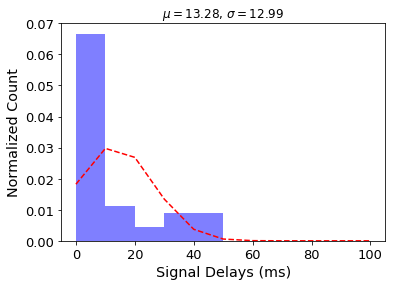

1063535 cv estimate distribution


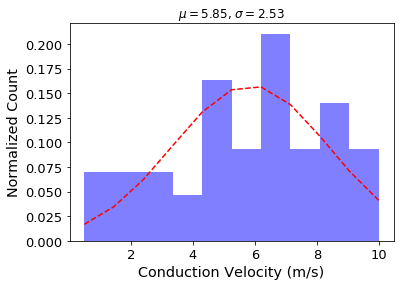

1063535 signal delay estimate distribution


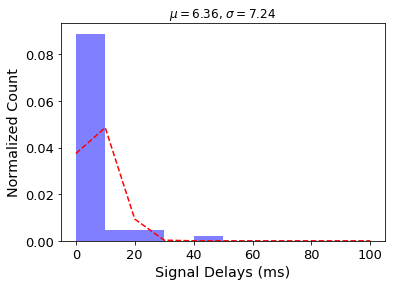

1063539 cv estimate distribution


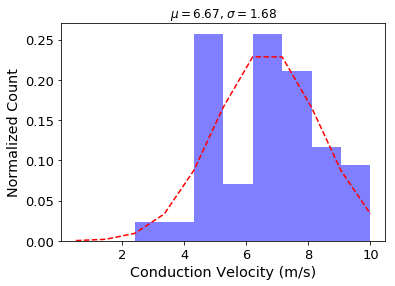

1063539 signal delay estimate distribution


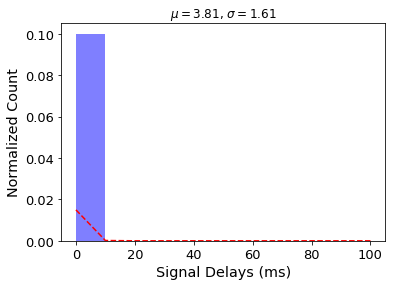

1067826 cv estimate distribution


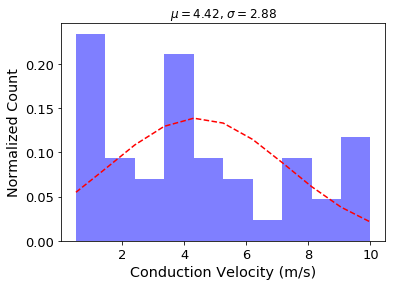

1067826 signal delay estimate distribution


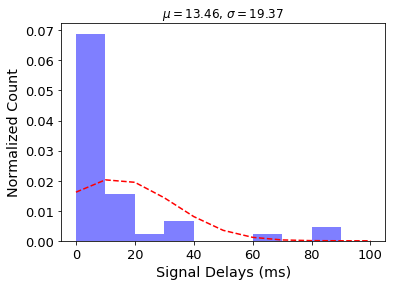

1067827 cv estimate distribution


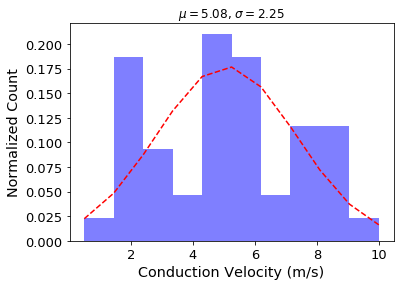

1067827 signal delay estimate distribution


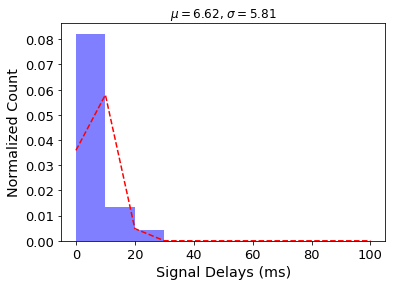

1067828 cv estimate distribution


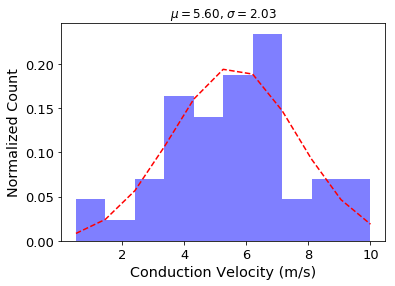

1067828 signal delay estimate distribution


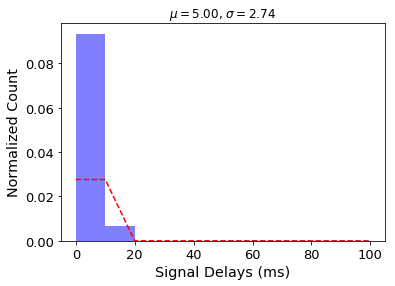

1146310 cv estimate distribution


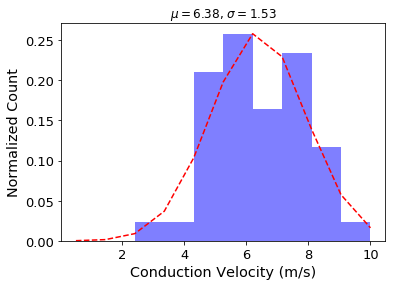

1146310 signal delay estimate distribution


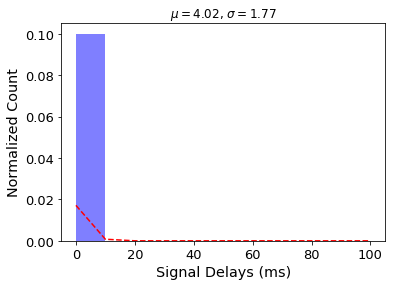

1146308 cv estimate distribution


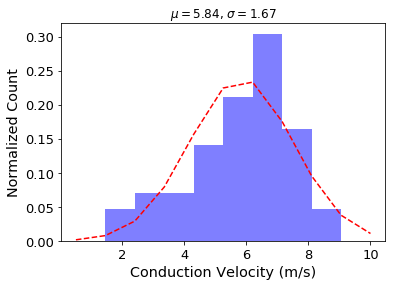

1146308 signal delay estimate distribution


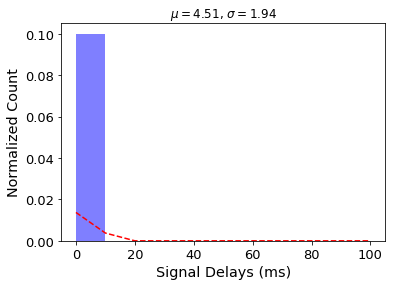

In [15]:
#Estimates
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
gr_means = []
gr_std = []
for cv in range(NUM_JOBS):

    print(JOB[cv], "cv estimate distribution")
    # the histogram of the data
    n, bins, patches = plt.hist(all_res[JOB[cv]]/1000, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))
    
    mu = np.average(all_res[JOB[cv]]/1000)
    sigma = np.std(all_res[JOB[cv]]/1000)
    
    gr_means.append(mu)
    gr_std.append(sigma)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    
    print(JOB[cv], "signal delay estimate distribution")
    trac = np.triu(master_tract,1).ravel()
    trac= trac[trac > 0]
    # the histogram of the data
    n, bins, patches = plt.hist((trac/all_res[JOB[cv]])*1000, density=True, facecolor='blue', alpha=0.5, range = (0,100))
    
    mu = np.average((trac/all_res[JOB[cv]])*1000)
    sigma = np.std((trac/all_res[JOB[cv]])*1000)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()

996938 cv true distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/l/lfefebvr/noorir/.local/lib/python3.6/site-packages/matplotlib/mlab.py:1513: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/home/l/lfefebvr/noorir/.local/lib/python3.6/site-packages/matplotlib/mlab.py:1513: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


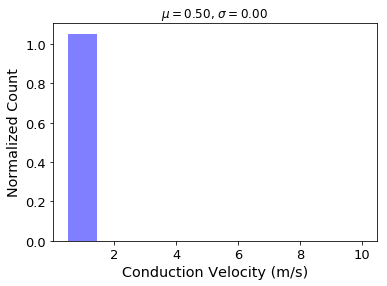

996938 signal delay true distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


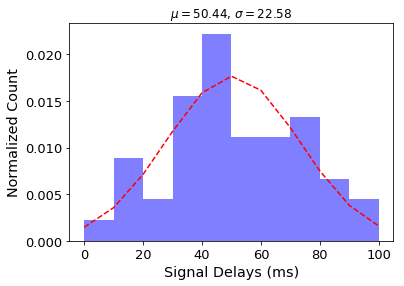

1063535 cv true distribution


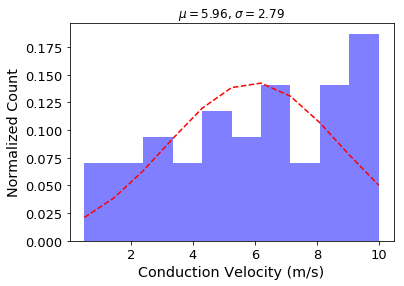

1063535 signal delay true distribution


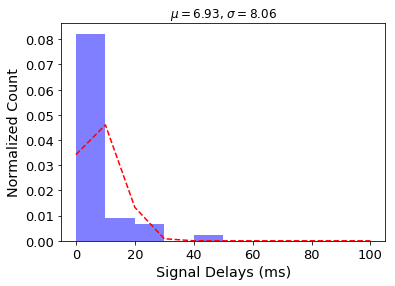

1063539 cv true distribution


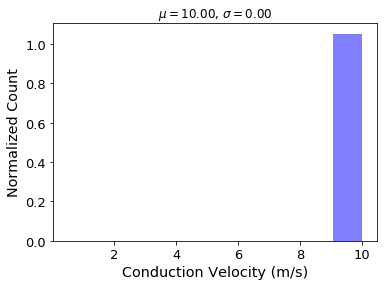

1063539 signal delay true distribution


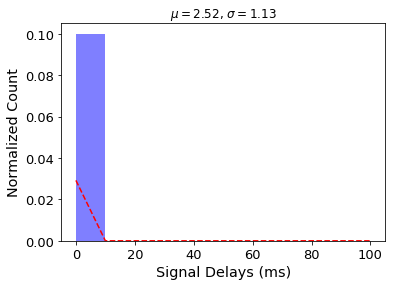

1067826 cv true distribution


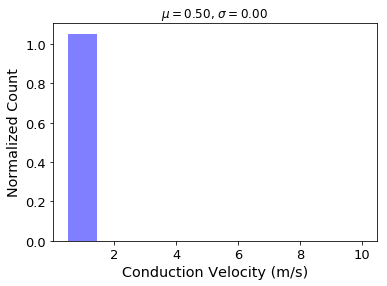

1067826 signal delay true distribution


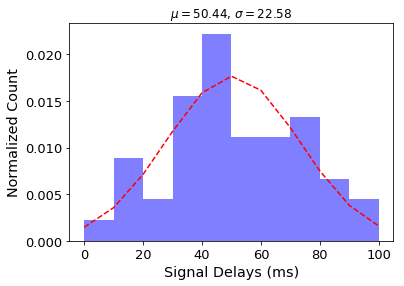

1067827 cv true distribution


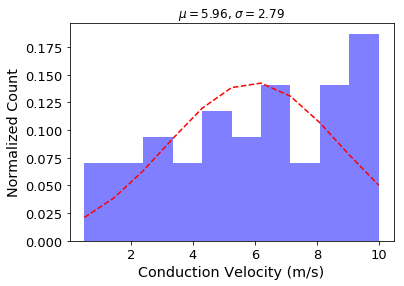

1067827 signal delay true distribution


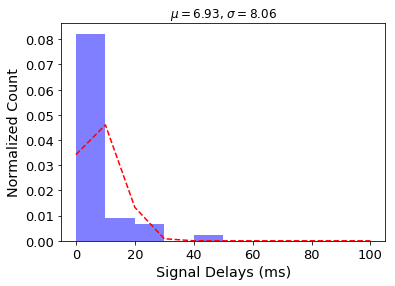

1067828 cv true distribution


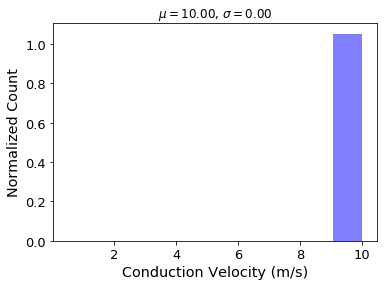

1067828 signal delay true distribution


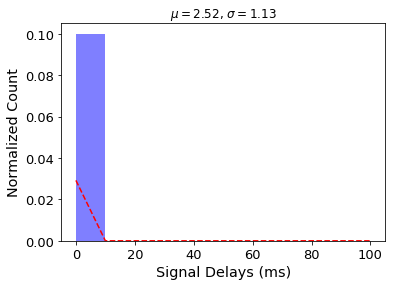

1146310 cv true distribution


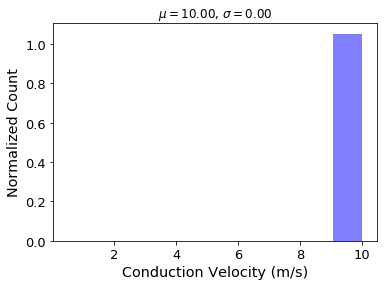

1146310 signal delay true distribution


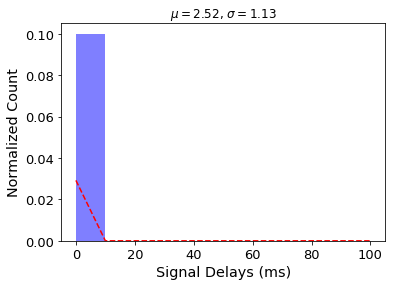

1146308 cv true distribution


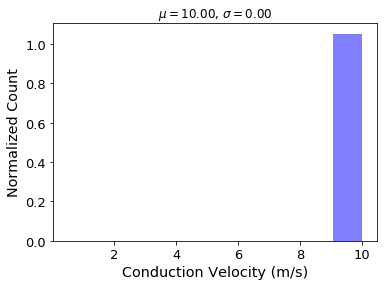

1146308 signal delay true distribution


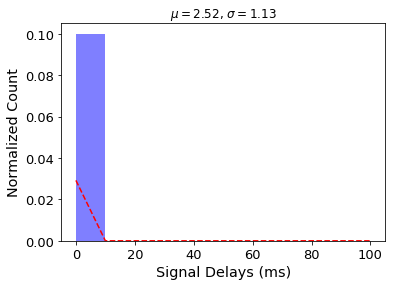

In [17]:
#True cv and signal delays

import matplotlib.mlab as mlab

for cv in range(NUM_JOBS):    
    # the histogram of the data
    print(JOB[cv], "cv true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(vec, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))

        mu = np.average(vec)
        sigma = np.std(vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()
        

    # the histogram of the data
    print(JOB[cv], "signal delay true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    trac = np.triu(tract_mat,1).ravel()
    trac= trac[trac > 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(trac/vec, density=True, facecolor='blue', alpha=0.5, range = (0,100))

        mu = np.average(trac/vec)
        sigma = np.std(trac/vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()